/home/vagrant/.miniconda3/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/vagrant/.miniconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


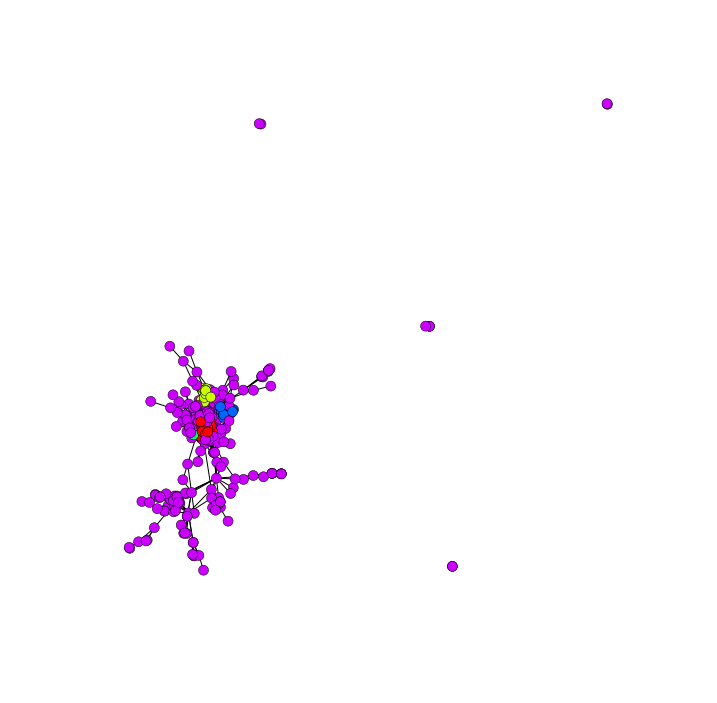

In [5]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import colorsys
import matplotlib.pylab as pylab
import glob

pylab.rcParams['figure.figsize'] = 12, 12  

def rgb_to_hex(rgb):
    return '#' + ''.join(['%02x' % int(p * 255) for p in rgb])

def get_colours(count):
    count = count + 1
    colours = [colorsys.hsv_to_rgb(h / count, 1, 1) for h in range(count)]
    return [rgb_to_hex(c) for c in colours]

def draw_graph(graph):
    nodes = set([n1 for n1, n2 in graph] + [n2 for n1, n2 in graph])
    G=nx.Graph()
    for node in nodes:
        G.add_node(node)
    for edge in graph:
        G.add_edge(edge[0], edge[1])
    pos = nx.spring_layout(G, k=0.1, iterations=50) 
    
    c = list(nx.k_clique_communities(G, 10))
    rainbow = get_colours(len(c))
    colours = ['r' for n in G.nodes()]
    for node in G.nodes():
        colours[G.nodes().index(node)] = rainbow[len(c)]
        for community in c:
            if node in community:
                colours[G.nodes().index(node)] = rainbow[c.index(community)]
    
    nx.draw_networkx(G,
                     pos,
                     node_size=100,
                     linewidths=0.5,
                     with_labels=False,
                     node_color=colours) 
    
    plt.axis("off")
    plt.show()

def read_file(name):
    with open(name, "r") as f:
        return[list(map(int, line.split())) for line in f.readlines()]
    

#graph = [(20, 21),(21, 22),(22, 23), (23, 24),(24, 25), (25, 20)]
#draw_graph(graph)
draw_graph(read_file("data/0.edges")) 